In [93]:
# Importing libraries
import pandas as pd
from datetime import datetime, timedelta

In [94]:
# 정주기 실적 Loading
df1 = pd.read_excel('소형압연_가열로_정주기온도3분.xlsx')
df1.head()

,설비_코드,측정_일시,측정_시각,가열대_로내_온도_상부,가열대_로내_온도_하부,균열대_로내_온도_상부_L,균열대_로내_온도_하부_L,균열대_로내_온도_상부_R,균열대_로내_온도_하부_R,가열대_GAS_유량,...,균열대E_1상부_AIR유량,균열대E_1하부_AIR유량,균열대W_1상부_AIR유량,균열대W_1하부_AIR유량,균열대E하부_O2유량,균열대E_1_하부O2유량,생성_일시,가열로_압력_세팅,처리_구분,처리_오류_내용
0,8601,20230913030000,30000,1137,1254,1138,1139,1129,1138,185,...,0,140,1558,0,291,65,2023-09-13 오전 2:59:55,1.3,NaN,NaN
1,8601,20230913030030,30030,1121,1250,1136,1132,1137,1139,81,...,1325,139,1839,0,286,101,2023-09-13 오전 3:00:25,1.3,NaN,NaN
2,8601,20230913030100,30100,1101,1251,1138,1133,1140,1136,118,...,0,142,1476,0,167,119,2023-09-13 오전 3:00:56,1.3,NaN,NaN
3,8601,20230913030130,30130,1095,1255,1135,1133,1135,1136,152,...,1099,141,1072,0,0,126,2023-09-13 오전 3:01:25,1.3,NaN,NaN
4,8601,20230913030200,30200,1097,1254,1139,1138,1131,1134,192,...,0,141,867,0,65,118,2023-09-13 오전 3:01:55,1.3,NaN,NaN


In [95]:
# 가열일보
df2 = pd.read_csv('가열일보.csv',encoding='cp949')
df2.head()

,근,조,LOT NO,일련 번호,STR NO,SER NO,HEAT NO,회수재 여부,사내강종,구 사내강종,...,불량명,결함깊이,중량.1,원인공정,판정코드,조치코드,검사일,검사자,검사조,생산품질(Event 내역)
0,1,B,B370193905,\5,4.0,1.0,S51497,N,STS420FS2,S420F,...,[공백],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919)Hoteye 선단 및 중단부 터짐 또는 크랙성결함검출_선단 터짐부절사 및 중...
1,1,B,B370193905,\6,1.0,1.0,S51497,N,STS420FS2,S420F,...,[공백],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919)Hoteye 선단 및 중단부 터짐 또는 크랙성결함검출_선단 터짐부절사 및 중...
2,1,B,B370193905,\7,NaN,NaN,S51497,N,STS420FS2,S420F,...,[공백],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919)Hoteye 선단 및 중단부 터짐 또는 크랙성결함검출_선단 터짐부절사 및 중...
3,1,B,B370193908,\1,3.0,16.0,S51497,N,STS420FS2,S420F,...,[공백],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BS-PT완료,REPORT 제출 8/22"
4,1,B,B370193908,\2,NaN,NaN,S51497,N,STS420FS2,S420F,...,[공백],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BS-PT완료,REPORT 제출 8/22"


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421 entries, 0 to 3420
Data columns (total 89 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   설비_코드            3421 non-null   int64  
 1   측정_일시            3421 non-null   int64  
 2   측정_시각            3421 non-null   int64  
 3   가열대_로내_온도_상부     3421 non-null   int64  
 4   가열대_로내_온도_하부     3421 non-null   int64  
 5   균열대_로내_온도_상부_L   3421 non-null   int64  
 6   균열대_로내_온도_하부_L   3421 non-null   int64  
 7   균열대_로내_온도_상부_R   3421 non-null   int64  
 8   균열대_로내_온도_하부_R   3421 non-null   int64  
 9   가열대_GAS_유량       3421 non-null   int64  
 10  가열대_AIR_유량       3421 non-null   int64  
 11  균열대_GAS_유량       3421 non-null   int64  
 12  균열대_AIR_유량       3421 non-null   int64  
 13  가열로_압력           3421 non-null   float64
 14  MAIN_GAS_압력      3421 non-null   int64  
 15  MAIN_GAS_유량      3421 non-null   int64  
 16  연소_공기_온도         3421 non-null   int64  
 17  DILUTIONAIR_온도

In [97]:
df1['heating_avg']=(df1['가열대_로내_온도_상부']+df1['가열대_로내_온도_하부'])/2
df1['soaking_avg']=(df1['균열대_로내_온도_상부_L']+df1['균열대_로내_온도_하부_L']+df1['균열대_로내_온도_상부_R']+df1['균열대_로내_온도_하부_R'])/4

In [98]:
df1[['heating_avg','soaking_avg']]

,heating_avg,soaking_avg
0,1195.5,1136.00
1,1185.5,1136.00
2,1176.0,1136.75
3,1175.0,1134.75
4,1175.5,1135.50
...,...,...
3416,1167.0,1261.75
3417,1168.0,1262.00
3418,1169.5,1262.50
3419,1168.5,1264.50


In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421 entries, 0 to 3420
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   설비_코드            3421 non-null   int64  
 1   측정_일시            3421 non-null   int64  
 2   측정_시각            3421 non-null   int64  
 3   가열대_로내_온도_상부     3421 non-null   int64  
 4   가열대_로내_온도_하부     3421 non-null   int64  
 5   균열대_로내_온도_상부_L   3421 non-null   int64  
 6   균열대_로내_온도_하부_L   3421 non-null   int64  
 7   균열대_로내_온도_상부_R   3421 non-null   int64  
 8   균열대_로내_온도_하부_R   3421 non-null   int64  
 9   가열대_GAS_유량       3421 non-null   int64  
 10  가열대_AIR_유량       3421 non-null   int64  
 11  균열대_GAS_유량       3421 non-null   int64  
 12  균열대_AIR_유량       3421 non-null   int64  
 13  가열로_압력           3421 non-null   float64
 14  MAIN_GAS_압력      3421 non-null   int64  
 15  MAIN_GAS_유량      3421 non-null   int64  
 16  연소_공기_온도         3421 non-null   int64  
 17  DILUTIONAIR_온도

In [100]:
df1['측정_일시'] = pd.to_datetime(df1['측정_일시'],format='%Y%m%d%H%M%S')
df1.head()


,설비_코드,측정_일시,측정_시각,가열대_로내_온도_상부,가열대_로내_온도_하부,균열대_로내_온도_상부_L,균열대_로내_온도_하부_L,균열대_로내_온도_상부_R,균열대_로내_온도_하부_R,가열대_GAS_유량,...,균열대W_1상부_AIR유량,균열대W_1하부_AIR유량,균열대E하부_O2유량,균열대E_1_하부O2유량,생성_일시,가열로_압력_세팅,처리_구분,처리_오류_내용,heating_avg,soaking_avg
0,8601,2023-09-13 03:00:00,30000,1137,1254,1138,1139,1129,1138,185,...,1558,0,291,65,2023-09-13 오전 2:59:55,1.3,NaN,NaN,1195.5,1136.00
1,8601,2023-09-13 03:00:30,30030,1121,1250,1136,1132,1137,1139,81,...,1839,0,286,101,2023-09-13 오전 3:00:25,1.3,NaN,NaN,1185.5,1136.00
2,8601,2023-09-13 03:01:00,30100,1101,1251,1138,1133,1140,1136,118,...,1476,0,167,119,2023-09-13 오전 3:00:56,1.3,NaN,NaN,1176.0,1136.75
3,8601,2023-09-13 03:01:30,30130,1095,1255,1135,1133,1135,1136,152,...,1072,0,0,126,2023-09-13 오전 3:01:25,1.3,NaN,NaN,1175.0,1134.75
4,8601,2023-09-13 03:02:00,30200,1097,1254,1139,1138,1131,1134,192,...,867,0,65,118,2023-09-13 오전 3:01:55,1.3,NaN,NaN,1175.5,1135.50


In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421 entries, 0 to 3420
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   설비_코드            3421 non-null   int64         
 1   측정_일시            3421 non-null   datetime64[ns]
 2   측정_시각            3421 non-null   int64         
 3   가열대_로내_온도_상부     3421 non-null   int64         
 4   가열대_로내_온도_하부     3421 non-null   int64         
 5   균열대_로내_온도_상부_L   3421 non-null   int64         
 6   균열대_로내_온도_하부_L   3421 non-null   int64         
 7   균열대_로내_온도_상부_R   3421 non-null   int64         
 8   균열대_로내_온도_하부_R   3421 non-null   int64         
 9   가열대_GAS_유량       3421 non-null   int64         
 10  가열대_AIR_유량       3421 non-null   int64         
 11  균열대_GAS_유량       3421 non-null   int64         
 12  균열대_AIR_유량       3421 non-null   int64         
 13  가열로_압력           3421 non-null   float64       
 14  MAIN_GAS_압력      3421 non-null   int64  

In [102]:
df2.head()

,근,조,LOT NO,일련 번호,STR NO,SER NO,HEAT NO,회수재 여부,사내강종,구 사내강종,...,불량명,결함깊이,중량.1,원인공정,판정코드,조치코드,검사일,검사자,검사조,생산품질(Event 내역)
0,1,B,B370193905,\5,4.0,1.0,S51497,N,STS420FS2,S420F,...,[공백],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919)Hoteye 선단 및 중단부 터짐 또는 크랙성결함검출_선단 터짐부절사 및 중...
1,1,B,B370193905,\6,1.0,1.0,S51497,N,STS420FS2,S420F,...,[공백],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919)Hoteye 선단 및 중단부 터짐 또는 크랙성결함검출_선단 터짐부절사 및 중...
2,1,B,B370193905,\7,NaN,NaN,S51497,N,STS420FS2,S420F,...,[공백],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919)Hoteye 선단 및 중단부 터짐 또는 크랙성결함검출_선단 터짐부절사 및 중...
3,1,B,B370193908,\1,3.0,16.0,S51497,N,STS420FS2,S420F,...,[공백],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BS-PT완료,REPORT 제출 8/22"
4,1,B,B370193908,\2,NaN,NaN,S51497,N,STS420FS2,S420F,...,[공백],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BS-PT완료,REPORT 제출 8/22"


In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   근               492 non-null    int64  
 1   조               492 non-null    object 
 2   LOT NO          492 non-null    object 
 3   일련 번호           492 non-null    object 
 4   STR NO          451 non-null    float64
 5   SER NO          451 non-null    float64
 6   HEAT NO         492 non-null    object 
 7   회수재 여부          492 non-null    object 
 8   사내강종            492 non-null    object 
 9   구 사내강종          492 non-null    object 
 10  사내강종(제강)        492 non-null    object 
 11  강종그룹            492 non-null    object 
 12  지시외경            492 non-null    float64
 13  외경              492 non-null    float64
 14  길이              492 non-null    object 
 15  중량              492 non-null    object 
 16  입고중량            247 non-null    object 
 17  주설비 구분          492 non-null    obj

In [104]:
df2[['일자','시각','일자.1']]

,일자,시각,일자.1
0,2023-09-13,3:52,2023-09-13
1,2023-09-13,3:54,2023-09-13
2,2023-09-13,3:55,2023-09-13
3,2023-09-13,3:57,2023-09-13
4,2023-09-13,3:57,2023-09-13
...,...,...,...
487,2023-09-14,3:46,2023-09-14
488,2023-09-14,3:48,2023-09-14
489,2023-09-14,3:49,2023-09-14
490,2023-09-14,3:50,2023-09-14


In [105]:
# Rename 'A' to 'B'
df2 = df2.rename(columns={'일자': '장입일자'})
df2 = df2.rename(columns={'시각': '장입시각'})
df2 = df2.rename(columns={'일자.1': '추출일자'})
df2 = df2.rename(columns={'시각.1': '추출시각'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   근               492 non-null    int64  
 1   조               492 non-null    object 
 2   LOT NO          492 non-null    object 
 3   일련 번호           492 non-null    object 
 4   STR NO          451 non-null    float64
 5   SER NO          451 non-null    float64
 6   HEAT NO         492 non-null    object 
 7   회수재 여부          492 non-null    object 
 8   사내강종            492 non-null    object 
 9   구 사내강종          492 non-null    object 
 10  사내강종(제강)        492 non-null    object 
 11  강종그룹            492 non-null    object 
 12  지시외경            492 non-null    float64
 13  외경              492 non-null    float64
 14  길이              492 non-null    object 
 15  중량              492 non-null    object 
 16  입고중량            247 non-null    object 
 17  주설비 구분          492 non-null    obj

In [106]:
df2['input_datetime'] = pd.to_datetime(df2['장입일자'] + ' ' + df2['장입시각'])
df2['output_datetime'] = pd.to_datetime(df2['추출일자'] + ' ' + df2['추출시각'])
df2[['input_datetime','output_datetime']]


,input_datetime,output_datetime
0,2023-09-13 03:52:00,2023-09-13 07:01:00
1,2023-09-13 03:54:00,2023-09-13 07:04:00
2,2023-09-13 03:55:00,2023-09-13 07:06:00
3,2023-09-13 03:57:00,2023-09-13 07:08:00
4,2023-09-13 03:57:00,2023-09-13 07:11:00
...,...,...
487,2023-09-14 03:46:00,2023-09-14 06:49:00
488,2023-09-14 03:48:00,2023-09-14 06:51:00
489,2023-09-14 03:49:00,2023-09-14 06:53:00
490,2023-09-14 03:50:00,2023-09-14 06:55:00


In [107]:
df2['heating_duration'] = pd.to_timedelta(df2['균열대'])
df2['soaking_enter'] = df2['output_datetime'] - df2['heating_duration']
df2[['input_datetime','soaking_enter','output_datetime']]

,input_datetime,soaking_enter,output_datetime
0,2023-09-13 03:52:00,2023-09-13 06:23:00,2023-09-13 07:01:00
1,2023-09-13 03:54:00,2023-09-13 06:24:00,2023-09-13 07:04:00
2,2023-09-13 03:55:00,2023-09-13 06:28:00,2023-09-13 07:06:00
3,2023-09-13 03:57:00,2023-09-13 06:28:00,2023-09-13 07:08:00
4,2023-09-13 03:57:00,2023-09-13 06:31:00,2023-09-13 07:11:00
...,...,...,...
487,2023-09-14 03:46:00,2023-09-14 05:44:00,2023-09-14 06:49:00
488,2023-09-14 03:48:00,2023-09-14 05:45:00,2023-09-14 06:51:00
489,2023-09-14 03:49:00,2023-09-14 05:49:00,2023-09-14 06:53:00
490,2023-09-14 03:50:00,2023-09-14 05:51:00,2023-09-14 06:55:00


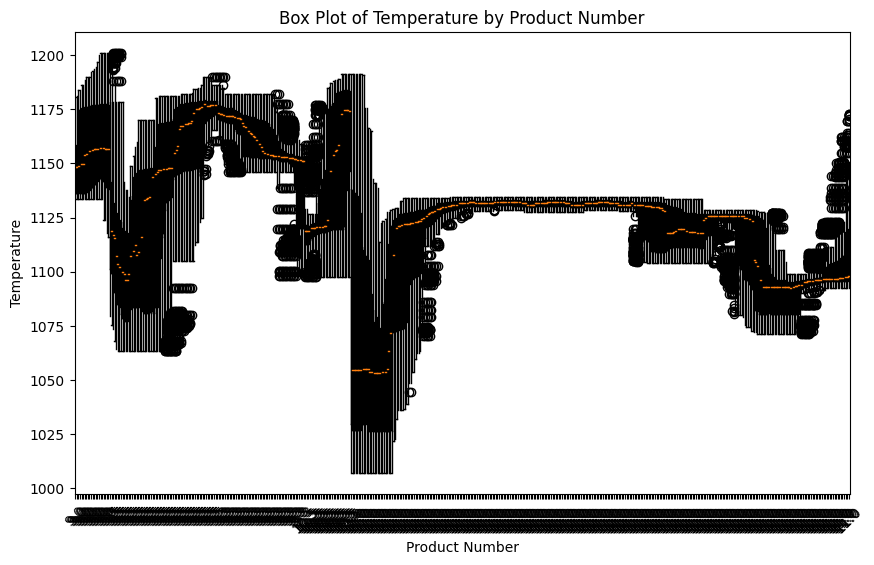

In [108]:
import matplotlib.pyplot as plt

box_plot_data = []
df2_SG = df2[df2['사내강종'] == 'STS304HCS5']
df2_dia =df2[df2['지시외경'] == 10.5]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2.iterrows():
    start_time = row['input_datetime']
    end_time = row['soaking_enter']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['heating_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
#plt.boxplot(box_plot_data, labels=df2['지시외경'])
plt.boxplot(box_plot_data)
x_labels=df2['지시외경'].tolist()
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.title('Box Plot of Temperature by Product Number')
plt.xlabel('Product Number')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()


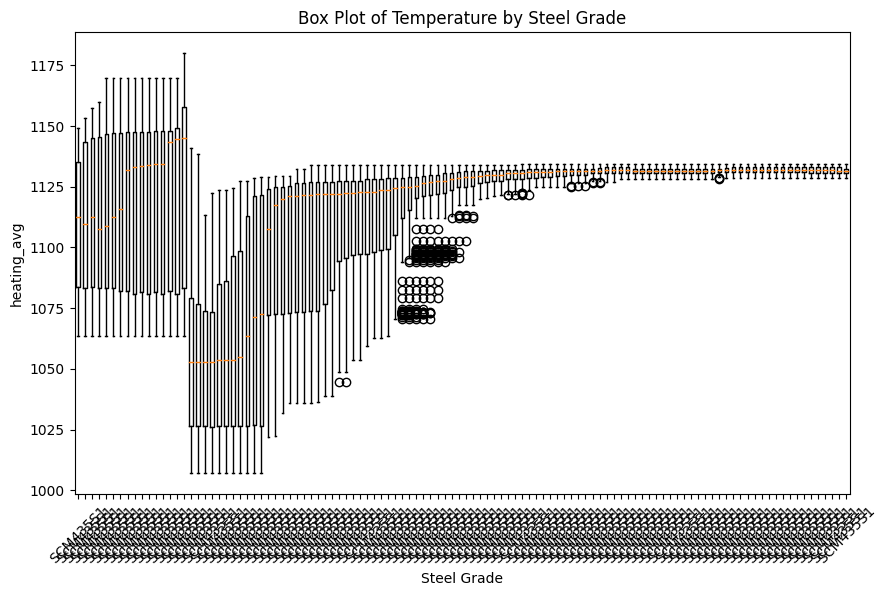

In [109]:
import matplotlib.pyplot as plt

box_plot_data = []
df2_SG = df2[df2['사내강종'] == 'SCM435S1']
#df2_dia =df2[df2['지시외경'] == 10.5]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_SG.iterrows():
    start_time = row['input_datetime']
    end_time = row['soaking_enter']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['heating_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
#plt.boxplot(box_plot_data, labels=df2['지시외경'])
plt.boxplot(box_plot_data)
x_labels=df2_SG['사내강종'].tolist()
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')
plt.ylabel('heating_avg')
plt.xticks(rotation=45)
plt.show()

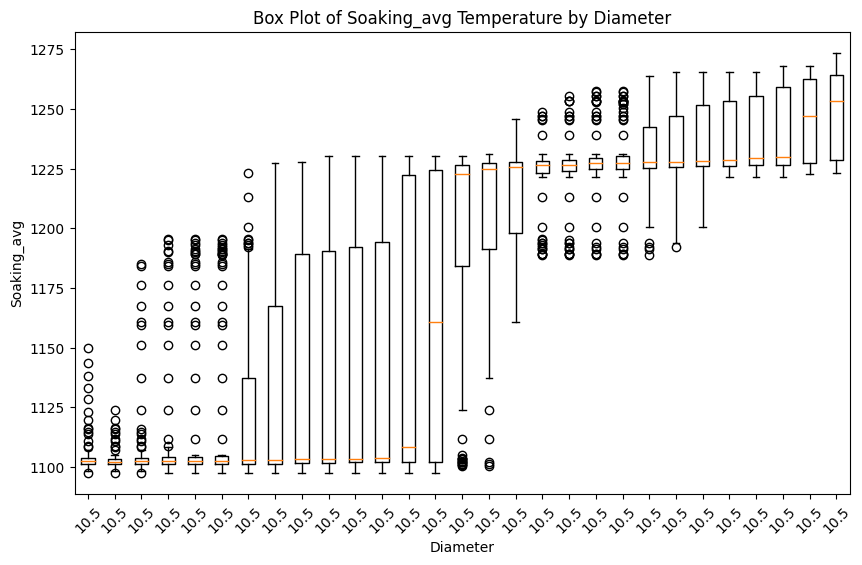

In [110]:
import matplotlib.pyplot as plt

box_plot_data = []
#df2_SG = df2[df2['사내강종'] == 'STS304HCS5']
df2_dia =df2[df2['지시외경'] == 10.5]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_dia.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
#plt.boxplot(box_plot_data, labels=df2['지시외경'])
plt.boxplot(box_plot_data)
x_labels=df2_dia['지시외경'].tolist()
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.title('Box Plot of Soaking_avg Temperature by Diameter')
plt.xlabel('Diameter')
plt.ylabel('Soaking_avg')
plt.xticks(rotation=45)
plt.show()

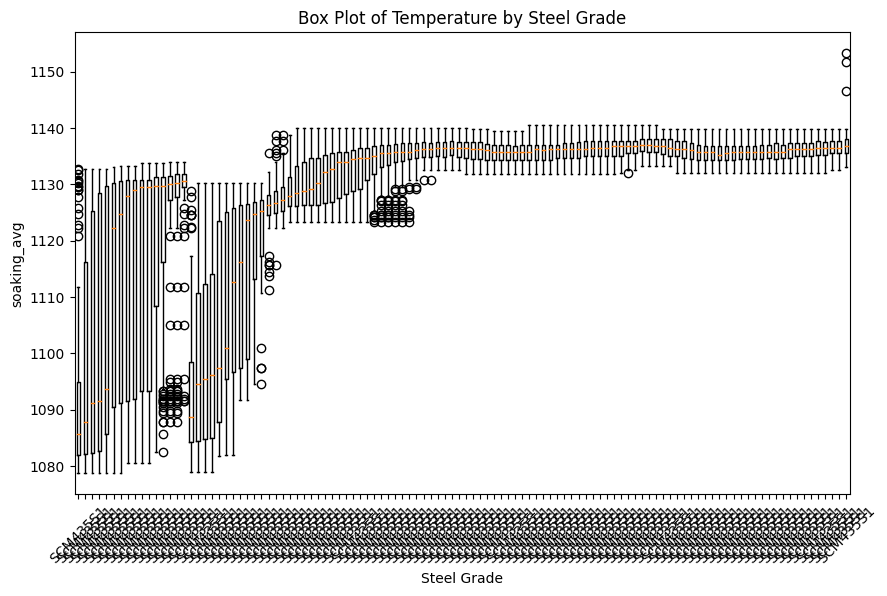

In [111]:
import matplotlib.pyplot as plt

box_plot_data = []
df2_SG = df2[df2['사내강종'] == 'SCM435S1']
#df2_dia =df2[df2['지시외경'] == 10.5]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_SG.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
#plt.boxplot(box_plot_data, labels=df2['지시외경'])
plt.boxplot(box_plot_data)
x_labels=df2_SG['사내강종'].tolist()
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')
plt.ylabel('soaking_avg')
plt.xticks(rotation=45)
plt.show()

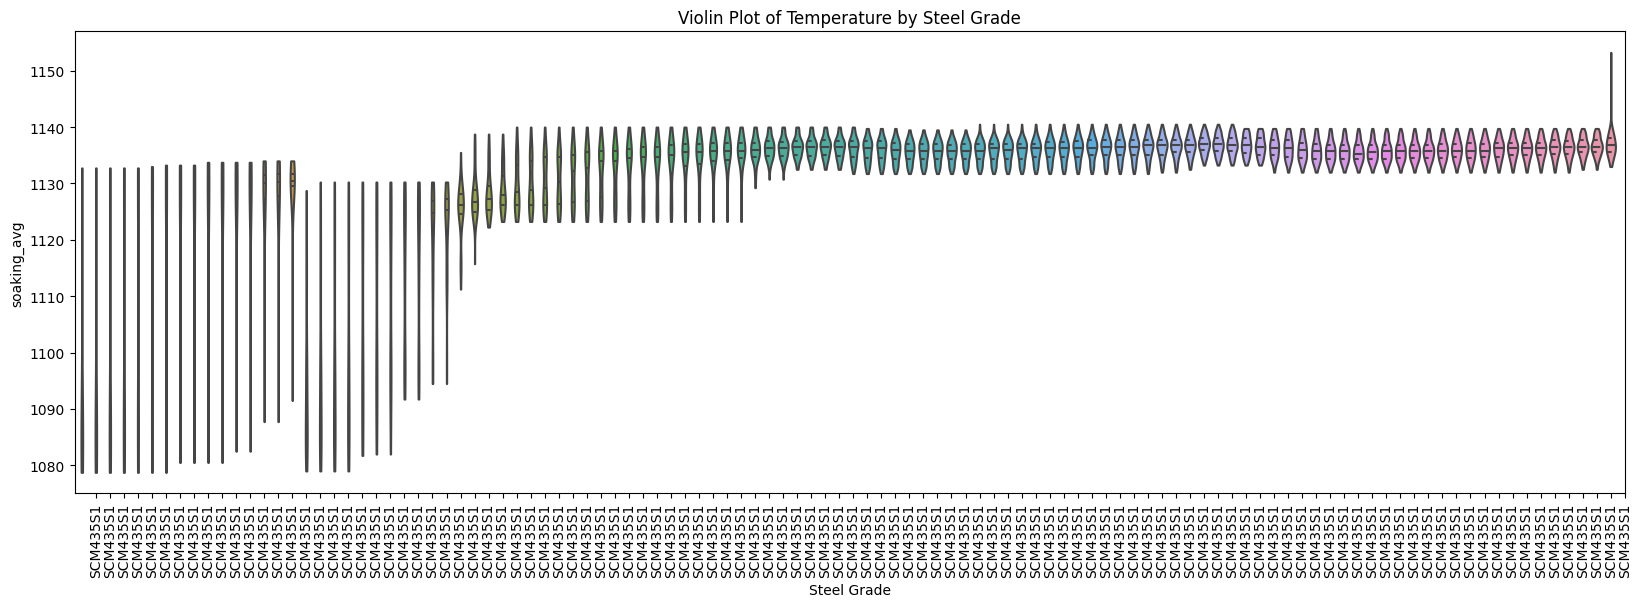

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

violin_plot_data = []

df2_SG = df2[df2['사내강종'] == 'SCM435S1']
#df2_dia =df2[df2['지시외경'] == 10.5]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_SG.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    violin_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(20, 6))
sns.violinplot(data=violin_plot_data, inner="quart", cut=0)
x_labels=df2_SG['사내강종'].tolist()
plt.xticks(range(1, len(x_labels)+1), x_labels)
plt.xticks(rotation=90)
plt.title('Violin Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')
plt.ylabel('soaking_avg')
plt.show()

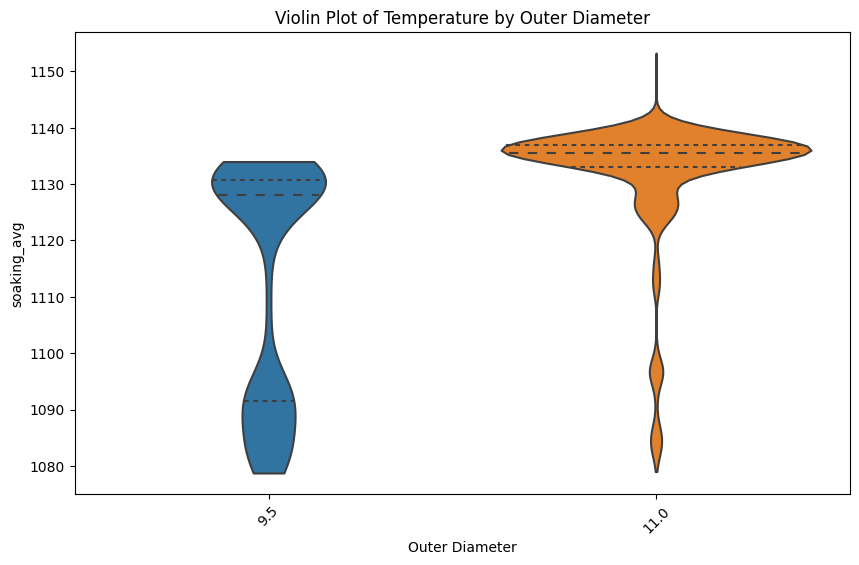

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

violin_plot_data = {}
df2_SG = df2[df2['사내강종'] == 'SCM435S1']
#df2_dia =df2[df2['지시외경'] == 10.5]

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_SG.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Store the temperature values in the dictionary with '지시외경' as the key
    diameter = row['지시외경']
    if diameter in violin_plot_data:
        violin_plot_data[diameter].extend(temperature_values)
    else:
        violin_plot_data[diameter] = temperature_values

# Create a violin plot by '지시외경'
plt.figure(figsize=(10, 6))
sns.violinplot(data=list(violin_plot_data.values()), inner="quart", cut=0)
plt.xticks(range(len(violin_plot_data)), violin_plot_data.keys())
plt.xticks(rotation=45)
plt.title('Violin Plot of Temperature by Outer Diameter')
plt.xlabel('Outer Diameter')
plt.ylabel('soaking_avg')
plt.show()

In [114]:
print("'지시외경' 열의 고유한 값들:", df2['지시외경'].unique())
print("'지시외경' 열의 고유한 값 개수:", len(df2['지시외경'].unique()))
print("'사내강종' 열의 고유한 값들:", df2['사내강종'].unique())
print("'사내강종' 열의 고유한 값 개수:", len(df2['사내강종'].unique()))

'지시외경' 열의 고유한 값들: [ 9.   9.5  9.3 10.5 11. ]
'지시외경' 열의 고유한 값 개수: 5
'사내강종' 열의 고유한 값들: ['STS420FS2' 'SWRCH45F1' 'STS410FSTS2' 'SCM435S1' 'STS420J2S2' 'STS304ES2'
 'STS304S2' 'STS304J3S2' 'STS304HCMS7' 'STS302S1' 'STS304CUS4' 'STS304LS2'
 'STS204CUS2' 'STS316FS3' 'STS303SY' 'STS303FS8' 'STS430FSMS2' 'SUM31D'
 'STS310SS2' 'STS304J3S9' 'STS304HCS5' 'STS201CUS3' 'STS303S4' 'SM45C1'
 'AE10B21W' 'SWRCH10A1' 'SWRCH18A' 'SWRCH25F' 'STS409HITIS2' 'STS630H00S1'
 'STS420J2S8' 'STS430FHS2' 'STS430FS6' 'STS304SX']
'사내강종' 열의 고유한 값 개수: 34


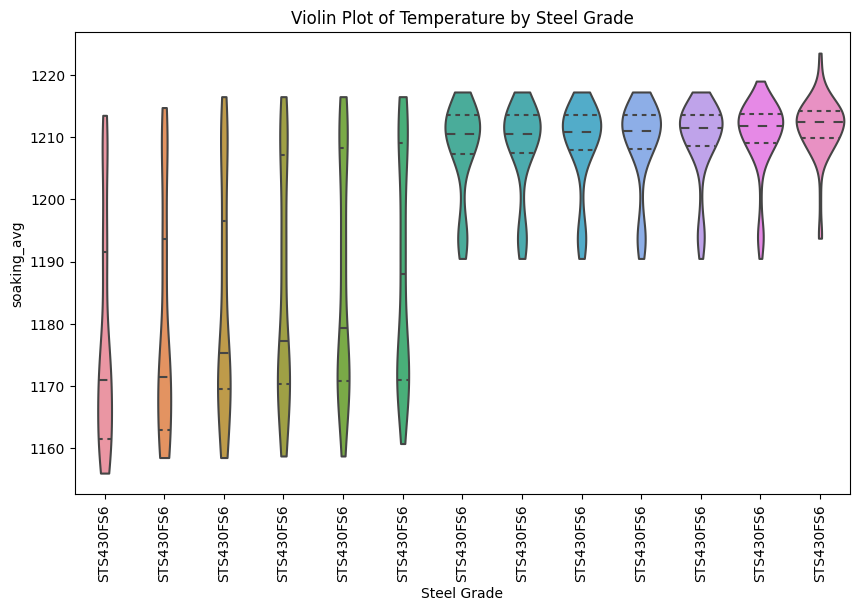

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

violin_plot_data = []

# 조건: '사내강종'이 'SCM435S1'이면서 '지시외경'이 10.5인 경우
condition = (df2['사내강종'] == 'STS430FS6') & (df2['지시외경'] == 11)

# 조건을 만족하는 데이터를 선택하여 df2_filtered에 저장
df2_filtered = df2[condition]

# 조건이 None (빈 조건) 인 경우 전체 df2 데이터를 선택
if condition is None:
    df2_filtered = df2.copy()

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df2_filtered.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    violin_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
sns.violinplot(data=violin_plot_data, inner="quart", cut=0)
x_labels=df2_filtered['사내강종'].tolist()
plt.xticks(range(len(x_labels)), x_labels)
plt.xticks(rotation=90)
plt.title('Violin Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')
plt.ylabel('soaking_avg')
plt.show()

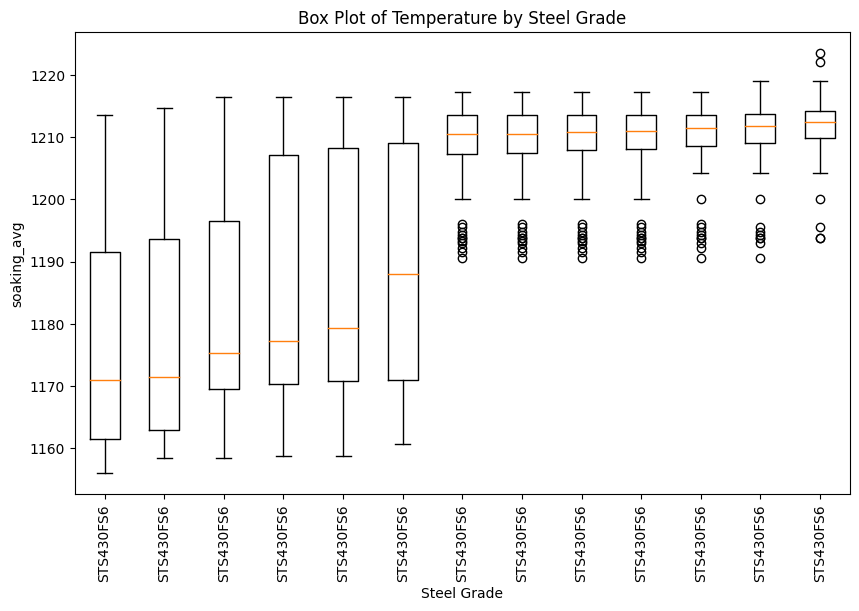

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

box_plot_data = []

# 조건: '사내강종'이 'SCM435S1'이면서 '지시외경'이 9.5인 경우
condition = (df2['사내강종'] == 'STS430FS6') & (df2['지시외경'] == 11)

# 조건을 만족하는 데이터를 선택하여 df2_filtered에 저장
df3_filtered = df2[condition]

# 조건이 비어 있는 경우 (None) 전체 df2 데이터를 선택
if df3_filtered.empty:
    df3_filtered = df2.copy()

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df3_filtered.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot by product number
plt.figure(figsize=(10, 6))
plt.boxplot(box_plot_data, labels=df3_filtered['사내강종'].tolist())
plt.xticks(rotation=90)
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')
plt.ylabel('soaking_avg')
plt.show()

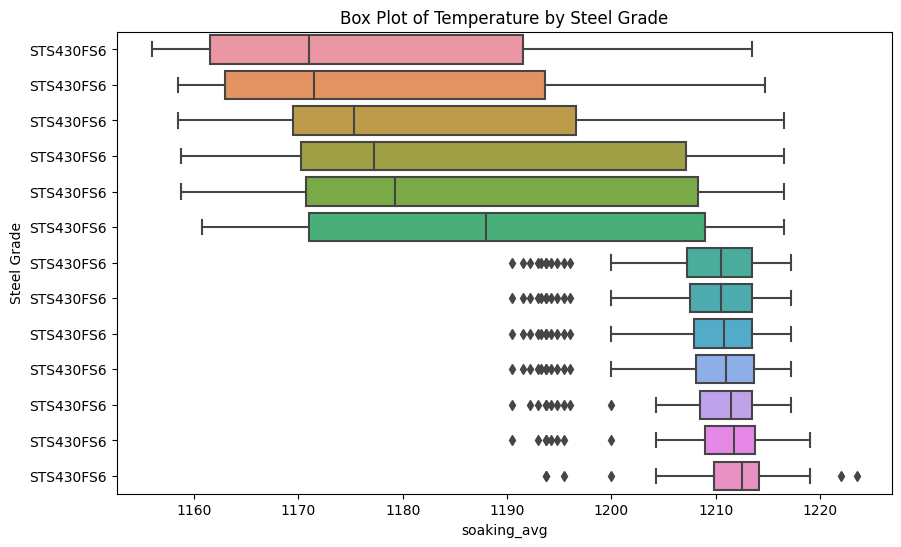

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

box_plot_data = []

# 조건: '사내강종'이 'STS430FS6'이면서 '지시외경'이 11인 경우
condition = (df2['사내강종'] == 'STS430FS6') & (df2['지시외경'] == 11)

# 조건을 만족하는 데이터를 선택하여 df2_filtered에 저장
df3_filtered = df2[condition]

# 조건이 비어 있는 경우 (None) 전체 df2 데이터를 선택
if df3_filtered.empty:
    df3_filtered = df2.copy()

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df3_filtered.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=box_plot_data, orient='horizontal')
plt.yticks(range(len(df3_filtered['사내강종'])), df3_filtered['사내강종'].tolist())
plt.xticks(rotation=0)
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('soaking_avg')
plt.ylabel('Steel Grade')
plt.show()


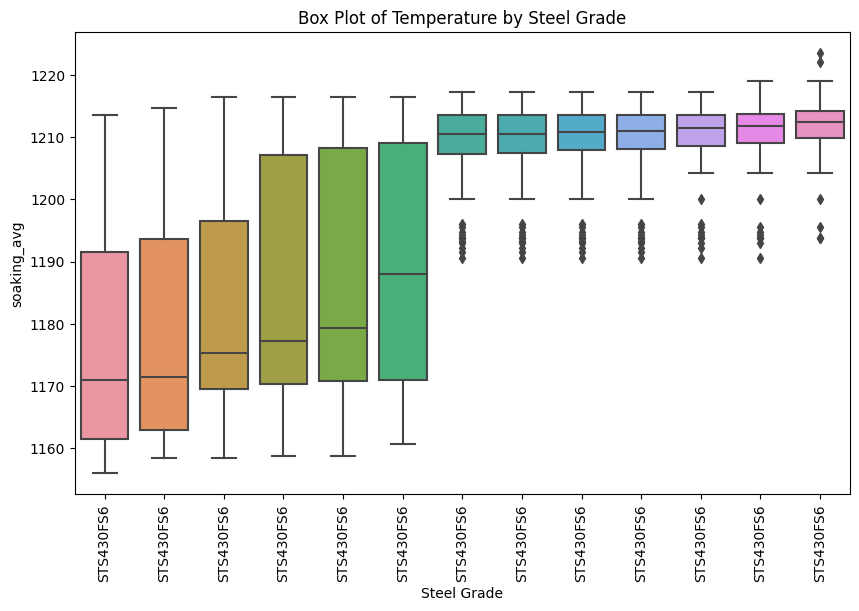

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

box_plot_data = []

# 조건: '사내강종'이 'STS430FS6'이면서 '지시외경'이 11인 경우
condition = (df2['사내강종'] == 'STS430FS6') & (df2['지시외경'] == 11)

# 조건을 만족하는 데이터를 선택하여 df2_filtered에 저장
df3_filtered = df2[condition]

# 조건이 비어 있는 경우 (None) 전체 df2 데이터를 선택
if df3_filtered.empty:
    df3_filtered = df2.copy()

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df3_filtered.iterrows():
    start_time = row['soaking_enter']
    end_time = row['output_datetime']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['soaking_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a horizontal box plot using seaborn with x and y axes swapped
plt.figure(figsize=(10, 6))
sns.boxplot(data=box_plot_data, orient='vertical')  # Changed 'horizontal' to 'vertical'
plt.xticks(range(len(df3_filtered['사내강종'])), df3_filtered['사내강종'].tolist(), rotation=90)  # Rotate x-axis labels
plt.yticks(rotation=0)  # Rotate y-axis labels
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')  # Changed 'soaking_avg' to 'Steel Grade' for x-label
plt.ylabel('soaking_avg')  # Changed 'Steel Grade' to 'soaking_avg' for y-label
plt.show()


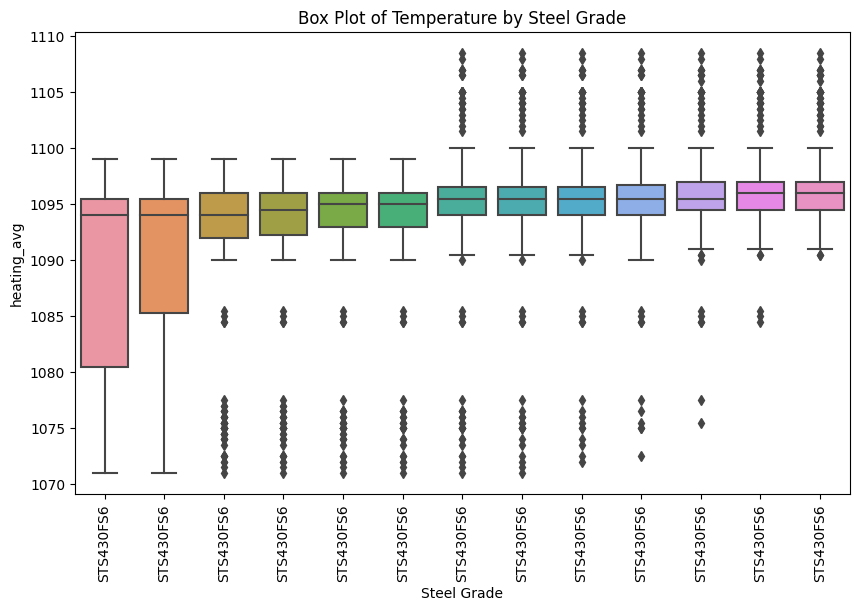

In [145]:
# 가열대 온도 
import matplotlib.pyplot as plt
import seaborn as sns

box_plot_data = []

# 조건: '사내강종'이 'STS430FS6'이면서 '지시외경'이 11인 경우
condition = (df2['사내강종'] == 'STS430FS6') & (df2['지시외경'] == 11)

# 조건을 만족하는 데이터를 선택하여 df2_filtered에 저장
df4_filtered = df2[condition]

# 조건이 비어 있는 경우 (None) 전체 df2 데이터를 선택
if df4_filtered.empty:
    df4_filtered = df2.copy()

# Iterate through each row in df1 and filter df2 data accordingly
for index, row in df4_filtered.iterrows():
    start_time = row['input_datetime']
    end_time = row['soaking_enter']
    
    # Filter df2 data within the start and end times
    filtered_data = df1[(df1['측정_일시'] >= start_time) & (df1['측정_일시'] <= end_time)]
    
    # Extract temperature values for the box plot
    temperature_values = filtered_data['heating_avg'].tolist()
    
    # Append the temperature values to the list
    box_plot_data.append(temperature_values)

# Create a horizontal box plot using seaborn with x and y axes swapped
plt.figure(figsize=(10, 6))
sns.boxplot(data=box_plot_data, orient='vertical')  # Changed 'horizontal' to 'vertical'
plt.xticks(range(len(df4_filtered['사내강종'])), df4_filtered['사내강종'].tolist(), rotation=90)  # Rotate x-axis labels
plt.yticks(rotation=0)  # Rotate y-axis labels
plt.title('Box Plot of Temperature by Steel Grade')
plt.xlabel('Steel Grade')  # Changed 'soaking_avg' to 'Steel Grade' for x-label
plt.ylabel('heating_avg')  # Changed 'Steel Grade' to 'heating_avg' for y-label
plt.show()


In [ ]:
# 그래프 가열대 모니터링 및 균열대 모니터링 코드 2개 합치고, 한번에 그래프 2개 동시에 표현 할수 있는 코드로 변경